In [156]:
import wget, os, pandas as pd, glob, geopandas as gpd
from zipfile import ZipFile

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [161]:
# download tabella codici istat 
mun_codes = pd.read_csv(
    'https://www.istat.it/storage/codici-unita-amministrative/Elenco-comuni-italiani.csv', 
    sep = ';', encoding ='latin1')

In [171]:
# a function to download the istat codes identifying the administrative areas 
# the function cleans the data by region number as variable cod_reg, if you want to keep all put 0
def download_cod_istat(cod_reg):
    
    # download tabella codici istat 
    mun_codes = pd.read_csv(
        'https://www.istat.it/storage/codici-unita-amministrative/Elenco-comuni-italiani.csv', 
        sep = ';', encoding ='latin1')
    
    # clean the table just for the useful columns
    mun_codes_synthesis = mun_codes.iloc[:, :12]
    
    # rename the columns of the dataframe
    mun_codes_synthesis.columns = ['cod_reg', 'cod_sov_com', 'cod_prov', 'cod_com', 'cod_com_alf', 'den_com',
                                  'den_com2', 'den_other_lan', 'cod_distr', 'geogr_distr', 'den_reg', 'den_prov']
    
    # drop not necessary columns
    mun_codes_synthesis.drop(['den_com2', 'den_other_lan', 'cod_distr', 'geogr_distr'], axis=1, inplace=True)

    # clean the data by regional number
    if cod_reg != 0:
        mun_codes_reg = mun_codes_synthesis.loc[mun_codes_synthesis['cod_reg'] == cod_reg]
    elif cod_reg == 0:
        mun_codes_reg = mun_codes_synthesis
    
    return mun_codes_reg

In [172]:
mun_codes_pied = download_cod_istat(1)

In [132]:
count_mun_to_download = len(mun_codes_pied)
den_prov_list = mun_codes_pied['den_prov'].unique()

try:
    mun_codes_pied.reset_index(drop=False, inplace=True)
except:
    mun_codes_pied.reset_index(drop=True, inplace=True)

for i in den_prov_list:
    mun_codes_prov = mun_codes_pied.loc[mun_codes_pied['den_prov'] == i]
    
    for index, row in mun_codes_prov.iterrows():
        index_num = row['index']
        mun_cod = row['cod_com_alf']
        mun_den = row['den_com']
        cod_reg = row['cod_reg']
        cod_prov = row['cod_prov']
        den_reg = row['den_reg']
        den_prov = row['den_prov']
        
        if len(str(mun_cod)) < 5:
            mun_cod_str = '00' + str(mun_cod)
        
        url = 'http://www.datigeo-piem-download.it/static/regp01/BDTRE2021_VECTOR/BDTRE_DATABASE_GEOTOPOGRAFICO_2021-LIMI_COMUNI_10_GAIMSDWL-' + mun_cod_str + '-EPSG32632-SHP.zip'
        
        missing_download = count_mun_to_download - index_num
        print('\n\nStill to download ' + str(missing_download) + ' of ' + str(count_mun_to_download))
        
        wget.download(url)
        
        zf = ZipFile('BDTRE_DATABASE_GEOTOPOGRAFICO_2021-LIMI_COMUNI_10_GAIMSDWL-'+ mun_cod_str +'-EPSG32632-SHP.zip', 'r')
        zf.extractall('BDTRE_downloaded/'+ i +'/' + mun_den)
        zf.close()
        
        os.remove('BDTRE_DATABASE_GEOTOPOGRAFICO_2021-LIMI_COMUNI_10_GAIMSDWL-'+ mun_cod_str +'-EPSG32632-SHP.zip')
    
    



Still to download 1181 of 1181
100% [......................................................] 3683888 / 3683888

Still to download 1180 of 1181
100% [......................................................] 2528241 / 2528241

Still to download 1179 of 1181
100% [....................................................] 11919640 / 11919640

Still to download 1178 of 1181
100% [......................................................] 2959207 / 2959207

Still to download 1177 of 1181
100% [......................................................] 6623540 / 6623540

Still to download 1176 of 1181
100% [......................................................] 2070391 / 2070391

Still to download 1175 of 1181
100% [......................................................] 5718466 / 5718466

Still to download 1174 of 1181
100% [......................................................] 2196502 / 2196502

Still to download 1173 of 1181
100% [......................................................] 3255541 /

100% [......................................................] 9682483 / 9682483

Still to download 1107 of 1181
100% [......................................................] 6763771 / 6763771

Still to download 1106 of 1181
100% [......................................................] 4283909 / 4283909

Still to download 1105 of 1181
100% [....................................................] 14162842 / 14162842

Still to download 1104 of 1181
100% [......................................................] 1740923 / 1740923

Still to download 1103 of 1181
100% [......................................................] 7279203 / 7279203

Still to download 1102 of 1181
100% [......................................................] 2340442 / 2340442

Still to download 1101 of 1181
100% [....................................................] 11608957 / 11608957

Still to download 1100 of 1181
100% [........................................................] 861833 / 861833

Still to download 1099 

100% [......................................................] 5644861 / 5644861

Still to download 1034 of 1181
100% [......................................................] 2706663 / 2706663

Still to download 1033 of 1181
100% [......................................................] 7905055 / 7905055

Still to download 1032 of 1181
100% [......................................................] 1131915 / 1131915

Still to download 1031 of 1181
100% [......................................................] 9929770 / 9929770

Still to download 1030 of 1181
100% [......................................................] 5622165 / 5622165

Still to download 1029 of 1181
100% [....................................................] 17702358 / 17702358

Still to download 1028 of 1181
100% [......................................................] 1562963 / 1562963

Still to download 1027 of 1181
100% [......................................................] 1516318 / 1516318

Still to download 1026 

  3% [..                                                  ]  1196032 / 29934958

  7% [...                                                 ]  2179072 / 29934958

 10% [.....                                               ]  3203072 / 29934958

 15% [........                                            ]  4751360 / 29934958

 21% [..........                                          ]  6299648 / 29934958

 26% [.............                                       ]  7823360 / 29934958

 31% [................                                    ]  9355264 / 29934958

 36% [..................                                  ] 10911744 / 29934958

 41% [.....................                               ] 12451840 / 29934958

 46% [........................                            ] 13991936 / 29934958

 51% [..........................                          ] 15523840 / 29934958

 56% [.............................                       ] 17055744 / 29934958

 62% [................................                    ] 18612224 / 29934958

 67% [..................................                  ] 20144128 / 29934958

 72% [.....................................               ] 21692416 / 29934958

100% [....................................................] 29934958 / 29934958

Still to download 961 of 1181
100% [......................................................] 2684266 / 2684266

Still to download 960 of 1181
100% [......................................................] 4169364 / 4169364

Still to download 959 of 1181
100% [....................................................] 16173931 / 16173931

Still to download 958 of 1181
100% [......................................................] 3009821 / 3009821

Still to download 957 of 1181
100% [......................................................] 8217677 / 8217677

Still to download 956 of 1181
100% [......................................................] 4401144 / 4401144

Still to download 955 of 1181
100% [......................................................] 2153698 / 2153698

Still to download 954 of 1181
100% [....................................................] 10264393 / 10264393

Still to download 953 of 1181
1

100% [......................................................] 7586884 / 7586884

Still to download 887 of 1181
100% [......................................................] 1428169 / 1428169

Still to download 886 of 1181
100% [......................................................] 3250003 / 3250003

Still to download 885 of 1181
100% [......................................................] 3084558 / 3084558

Still to download 884 of 1181
100% [......................................................] 2461353 / 2461353

Still to download 883 of 1181
100% [......................................................] 6935771 / 6935771

Still to download 882 of 1181
100% [....................................................] 18005302 / 18005302

Still to download 881 of 1181
100% [......................................................] 4686340 / 4686340

Still to download 880 of 1181
100% [......................................................] 3358866 / 3358866

Still to download 879 of 1181
1

100% [....................................................] 14086787 / 14086787

Still to download 813 of 1181
100% [......................................................] 8988305 / 8988305

Still to download 812 of 1181
100% [......................................................] 1515367 / 1515367

Still to download 811 of 1181
100% [......................................................] 5229402 / 5229402

Still to download 810 of 1181
100% [......................................................] 2237258 / 2237258

Still to download 809 of 1181
100% [......................................................] 4427757 / 4427757

Still to download 808 of 1181
100% [......................................................] 3045807 / 3045807

Still to download 807 of 1181
100% [......................................................] 1160882 / 1160882

Still to download 806 of 1181
100% [........................................................] 907005 / 907005

Still to download 805 of 1181
1

100% [........................................................] 982688 / 982688

Still to download 739 of 1181
100% [......................................................] 2021151 / 2021151

Still to download 738 of 1181
100% [......................................................] 3210005 / 3210005

Still to download 737 of 1181
100% [......................................................] 2877425 / 2877425

Still to download 736 of 1181
100% [......................................................] 1883317 / 1883317

Still to download 735 of 1181
100% [......................................................] 2254775 / 2254775

Still to download 734 of 1181
100% [......................................................] 3598826 / 3598826

Still to download 733 of 1181
100% [......................................................] 3835947 / 3835947

Still to download 732 of 1181
100% [......................................................] 1664515 / 1664515

Still to download 731 of 1181
1

100% [......................................................] 5355716 / 5355716

Still to download 665 of 1181
100% [......................................................] 5771997 / 5771997

Still to download 664 of 1181
100% [....................................................] 12437494 / 12437494

Still to download 663 of 1181
100% [......................................................] 3367885 / 3367885

Still to download 662 of 1181
100% [......................................................] 7290143 / 7290143

Still to download 661 of 1181
100% [......................................................] 3983266 / 3983266

Still to download 660 of 1181
100% [......................................................] 2631172 / 2631172

Still to download 659 of 1181
100% [......................................................] 5433038 / 5433038

Still to download 658 of 1181
100% [......................................................] 1950688 / 1950688

Still to download 657 of 1181
1

100% [......................................................] 2253611 / 2253611

Still to download 591 of 1181
100% [......................................................] 6905355 / 6905355

Still to download 590 of 1181
100% [......................................................] 2557403 / 2557403

Still to download 589 of 1181
100% [......................................................] 7071745 / 7071745

Still to download 588 of 1181
100% [......................................................] 5215213 / 5215213

Still to download 587 of 1181
100% [......................................................] 2905759 / 2905759

Still to download 586 of 1181
100% [......................................................] 3921128 / 3921128

Still to download 585 of 1181
100% [......................................................] 2256966 / 2256966

Still to download 584 of 1181
100% [......................................................] 8570174 / 8570174

Still to download 583 of 1181
1

100% [......................................................] 7088142 / 7088142

Still to download 517 of 1181
100% [......................................................] 6454644 / 6454644

Still to download 516 of 1181
100% [......................................................] 7077553 / 7077553

Still to download 515 of 1181
100% [......................................................] 1826515 / 1826515

Still to download 514 of 1181
100% [......................................................] 3835308 / 3835308

Still to download 513 of 1181
100% [....................................................] 19098108 / 19098108

Still to download 512 of 1181
100% [......................................................] 3366889 / 3366889

Still to download 511 of 1181
100% [......................................................] 5200937 / 5200937

Still to download 510 of 1181
100% [......................................................] 1614997 / 1614997

Still to download 509 of 1181
1

100% [......................................................] 1807198 / 1807198

Still to download 443 of 1181
100% [......................................................] 4062175 / 4062175

Still to download 442 of 1181
100% [......................................................] 3417891 / 3417891

Still to download 441 of 1181
100% [......................................................] 3642672 / 3642672

Still to download 440 of 1181
100% [......................................................] 4510605 / 4510605

Still to download 439 of 1181
100% [......................................................] 3407799 / 3407799

Still to download 438 of 1181
100% [......................................................] 2055250 / 2055250

Still to download 437 of 1181
100% [......................................................] 9660249 / 9660249

Still to download 436 of 1181
100% [......................................................] 3568911 / 3568911

Still to download 435 of 1181
1

100% [......................................................] 2659860 / 2659860

Still to download 369 of 1181
100% [......................................................] 5341917 / 5341917

Still to download 368 of 1181
100% [........................................................] 974413 / 974413

Still to download 367 of 1181
100% [......................................................] 3427077 / 3427077

Still to download 366 of 1181
100% [......................................................] 2168637 / 2168637

Still to download 365 of 1181
100% [......................................................] 2221632 / 2221632

Still to download 364 of 1181
100% [......................................................] 2713241 / 2713241

Still to download 363 of 1181
100% [......................................................] 3313692 / 3313692

Still to download 362 of 1181
100% [......................................................] 8288475 / 8288475

Still to download 361 of 1181
1

100% [......................................................] 2188431 / 2188431

Still to download 295 of 1181
100% [......................................................] 6457974 / 6457974

Still to download 294 of 1181
100% [......................................................] 5543032 / 5543032

Still to download 293 of 1181
100% [......................................................] 1806990 / 1806990

Still to download 292 of 1181
100% [........................................................] 849804 / 849804

Still to download 291 of 1181
100% [......................................................] 6160852 / 6160852

Still to download 290 of 1181
100% [......................................................] 1678268 / 1678268

Still to download 289 of 1181
100% [......................................................] 4092009 / 4092009

Still to download 288 of 1181
100% [......................................................] 2463853 / 2463853

Still to download 287 of 1181
1

100% [......................................................] 1740279 / 1740279

Still to download 221 of 1181
100% [......................................................] 3335616 / 3335616

Still to download 220 of 1181
100% [....................................................] 10473424 / 10473424

Still to download 219 of 1181
100% [......................................................] 3244837 / 3244837

Still to download 218 of 1181
100% [......................................................] 4333732 / 4333732

Still to download 217 of 1181
100% [......................................................] 1104008 / 1104008

Still to download 216 of 1181
100% [......................................................] 8659135 / 8659135

Still to download 215 of 1181
100% [......................................................] 3550613 / 3550613

Still to download 214 of 1181
100% [......................................................] 1674084 / 1674084

Still to download 213 of 1181
1

 23% [............                                          ] 1097728 / 4635337

100% [......................................................] 4635337 / 4635337

Still to download 147 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 146 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 145 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 144 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 143 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 142 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 141 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 140 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 139 of 1181
1

100% [......................................................] 4635337 / 4635337

Still to download 73 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 72 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 71 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 70 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 69 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 68 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 67 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 66 of 1181
100% [......................................................] 4635337 / 4635337

Still to download 65 of 1181
100% [....

In [135]:
list_paths = glob.glob("BDTRE_downloaded/*")

In [136]:
list_paths

['BDTRE_downloaded/Verbano-Cusio-Ossola',
 'BDTRE_downloaded/Cuneo',
 'BDTRE_downloaded/Vercelli',
 'BDTRE_downloaded/Torino',
 'BDTRE_downloaded/Novara',
 'BDTRE_downloaded/Alessandria',
 'BDTRE_downloaded/Biella',
 'BDTRE_downloaded/Asti']

In [140]:
list_mun_paths = []

for i in list_paths:
    list_mun_paths.append(glob.glob(i + "/*"))

In [180]:
list_mun_paths[2]

['BDTRE_downloaded/Vercelli/Fontanetto Po',
 'BDTRE_downloaded/Vercelli/Ghislarengo',
 'BDTRE_downloaded/Vercelli/Stroppiana',
 'BDTRE_downloaded/Vercelli/Rassa',
 'BDTRE_downloaded/Vercelli/Villata',
 'BDTRE_downloaded/Vercelli/Balmuccia',
 'BDTRE_downloaded/Vercelli/Vocca',
 'BDTRE_downloaded/Vercelli/Sali Vercellese',
 'BDTRE_downloaded/Vercelli/Alagna Valsesia',
 'BDTRE_downloaded/Vercelli/Collobiano',
 'BDTRE_downloaded/Vercelli/Albano Vercellese',
 'BDTRE_downloaded/Vercelli/Borgo Vercelli',
 'BDTRE_downloaded/Vercelli/Carisio',
 'BDTRE_downloaded/Vercelli/Mollia',
 'BDTRE_downloaded/Vercelli/Ronsecco',
 'BDTRE_downloaded/Vercelli/Borgosesia',
 'BDTRE_downloaded/Vercelli/Alto Sermenza',
 'BDTRE_downloaded/Vercelli/Casanova Elvo',
 'BDTRE_downloaded/Vercelli/Caresana',
 'BDTRE_downloaded/Vercelli/Cellio con Breia',
 'BDTRE_downloaded/Vercelli/Postua',
 'BDTRE_downloaded/Vercelli/Scopello',
 'BDTRE_downloaded/Vercelli/Quarona',
 'BDTRE_downloaded/Vercelli/Quinto Vercellese',
 'BDTR

In [146]:
concat_list = [j for i in list_mun_paths for j in i]

In [147]:
list_folders_paths = []

for i in concat_list:
    list_shp_paths.append(glob.glob(i + "/*"))

In [149]:
concat_list2 = [j for i in list_shp_paths for j in i]

In [150]:
list_shp_paths = []

for i in concat_list2:
    list_shp_paths.append(glob.glob(i + "/*"))

In [152]:
concat_list3 = [j for i in list_shp_paths for j in i]

In [158]:
list_shp_clean_paths = [v for v in concat_list3 if 'shp' in v]

In [183]:
concat_list3

['BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/tralic_2021.dbf',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/cs_edi_2021.shp',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/edifc_2021.shx',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/attr_sp_2021.prj',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/edifc_2021.shp',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/cs_edi_2021.shx',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/edi_min_2021.prj',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/un_vol_2021.shp',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/ele_cp_2021.prj',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/un_vol_2021.shx',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/aatt_2021.prj',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/un_vol_2021.dbf',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/tralic_2021.shx',
 'BDTRE_downloaded/Verbano-Cusio-Ossola/Druogno/IMM/cr_edf_2021.prj',
 'BDTRE_downloaded/Ver

In [184]:
gdf = gpd.read_file(list_shp_clean_paths[0])

<AxesSubplot:>

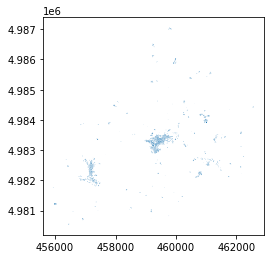

In [185]:
gdf.plot()